<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Trabajaremos con un dataset que contiene muestras de aceite extraidas a camiones de minería. Estas muestras son extraíadas a diferentes componentes de los camiones (Motor, Diferencial, etc)

Las muestras se envían a un laboratorio que analiza los diferentes componentes químicos de las mismas (Hierro, Cromo, presencia de Agua, horas de utitización, etc), luego de analizarlas emiten un informe indicando el estado de la muesta,  lo que permite a los analistas encontar posibles fallas en los equipos, previmiendo futuras roturas.

El dataset cuenta con X features, siendo las más importantes

* Componente: Indica a que componente pertenece la muestra
* Horas Funcionamiento: Indica la cantidad de horas de funcionamiento del camión (sería como el kilometraje de los camiones)
* Horas del Aceite: Representa la cantidad de horas de utilización del aceite (este dato es importante dado que a medida que, a mayor horas de uso del aceite, el mismo comienza a desgastarse)
* Resultado: (El laboratorio indica si la muestra de aceite está Bien = 1, Regular=2, Mal=3)
* St: Presencia de Hollin en el Aceite
* Al:  Presencia de Aluminio en el Aceite
* Fe	 Presencia de Hierro en el Aceite
* Si  Presencia de Silicio en el Aceite
* Na	 Presencia de Sodio en el Aceite
* Visco: Viscosidad del aceite

El datase cuenta con otros features que si bien, a priori podrían no ser tan relevantes, podrían ser utilizados para encontrar algún patrón no conocido


En el presente práctico intentaremos analizar las siguiente preguntas
* Existe alguna relación  entre las horas de uso del Aceite y alguno de los features mas importantes enumerados arriba (St, Al, Fe, Si, Na, Visco)?
* Existe alguna relación entre las horas de funcionamiento del Equipo y los features del punto anterior
* Las horas promedio de uso del aceite es similar entre los diferentes componentes (Motor, diferencial, etc)



In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.9.0'

In [12]:
pandas.__version__

'0.24.2'

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.7MB/s 


In [0]:
link  = "https://drive.google.com/open?id=1clj_5svqE24_u2GjvAxpLwv6mjiV81hP"
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1clj_5svqE24_u2GjvAxpLwv6mjiV81hP


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
dataset = pandas.read_csv('Filename.csv')

In [2]:
dataset = pandas.read_csv('OilDataSet.csv')

## 1. Análisis General de las variables

  1. Realizar un análisis de las variables que presenta el dataset (al margen de analizar los features mas importantes que comentamos al inicio del notebook, revisar el resto de los features)
  .
  2. Obtener media, mediana y desviación estándar de 4 Features. Agrupando esta información por Componente (¿Existe alguna relación entre los valores de los diferentes componentes?)
  3. Dado que existen featues que  no se encuentran completos (esto es porque no se realiza el análisis de todos los componentes químicos cada vez que se obtiene una muestra)¿ Cual crees que sería la mejor forma de completar los datos faltantes?
  4. Uno de los features mas importantes en el análisis de Aceites es la presencia de Hierro en el mismo, ¿las muestras entregadas presenta datos homogeneos en este parámetros? ¡Existen outliers? ¿Hay alguan relación entre este feature y el resultado de la muestra entregado por el laboratorio?
  
  

## 2. Graficar 

1. Toma los motores de  3 equipos al azar (la columna Equipo contiene el Id del camión) y grafica la evolución de 3 features a lo largo del tiempo ¿Se puede ver algún patron en el comportamiento de los features?

2.Ahora realiza los mismos gráficos pero tomando un equpo y 3 componentes y analiza el resultado


## 3. Correlaciones

Existen dos hipotesis que tenemos respecto al análisis realizado por el laboratorio de aceite que pretendemos afirmar o refutar analizando la correlación de faribales

1) A mayor cantidad de horas de uso de aceite, baja la viscocidad del mismo y aumenta la presencia de Hierro en el mismo

2) La presencia de Sodio (Na) en las muestras de aceite está directamente relacionada con el resultado de la muestra (A mayor presencia de Sodio, el laboratorio analiza la muestra con resultado = 3)

* Analizar la correlación de estas variables
* Que gráfica utilizarías para representar de una manera clara los resultados de tus conclusiones


* Opcional: Buscar correlaciones entre otros featues y los resultados del laboratorio. Existe alguna relación oculta que no está siendo considerada por los analistas en este momento


In [3]:
dataset

Equipo           Componente      Id  Resultado  Horas Funcionamiento  \
0        1355       Masa Izquierda  284178          1                 22729   
1        1355     Sist. Hidráulico  273622          1                 21950   
2        1355     Sist. Hidráulico  284077          1                 22729   
3        1359          Convertidor  207528          1                 44238   
4        1359          Convertidor  253179          1                 47386   
5        1359  Diferencial Trasero  253188          1                 47118   
6        1359  Diferencial Trasero  266618          3                 48300   
7        1359  Diferencial Trasero  269035          3                 48385   
8        1359       Mando Final TD  205031          1                 44460   
9        1359       Mando Final TD  207570          1                 44006   
10       1359         Masa Derecha  254906          1                 46874   
11       1359         Masa Derecha  262028          1                 48005   
12       1359         Masa Derecha  271502          3                 48626   
13       1359       Masa Izquierda  279965          1                 49236   
14       1359                Motor  207515          1                 44238   
15       1359                Motor  253079          1                 47386   
16       1359                Motor  254267          1                 46670   
17       1359                Motor  258260          1                 47672   
18       1359                Motor  271496          1                 48626   
19       1359                Motor  279960          1                 49236   
20       1359    Sist de Dirección  279964          1                 49236   
21       1359     Sist. Hidráulico  254900          1                 46874   
22       1359     Sist. Hidráulico  279963          3                 49236   
23       1355       Mando Final TI  278663          1                 22349   
24       1355       Mando Final TI  284026          2                 22729   
25       1355         Masa Derecha  278700          3                 22349   
26       1356    Sist de Dirección  155974          1                 27624   
27       1356     Sist. Hidráulico  155972          3                 27624   
28       1357    Sist de Dirección  156984          1                 27876   
29       1359          Convertidor  266613          1                 48300   
...       ...                  ...     ...        ...                   ...   
18439    2060          Transmisión  250837          1                  1379   
18440    2060          Transmisión  266287          1                  2611   
18441    2061          Convertidor  238190          2                   256   
18442    2061          Convertidor  247541          1                   985   
18443    2061          Convertidor  276097          1                  3315   
18444    2061  Diferencial Trasero  273713          2                 30057   
18445    2061  Diferencial Trasero  276191          2                  3315   
18446    2061       Mando Final TD  240697          1                   477   
18447    2061       Mando Final TD  244632          2                   758   
18448    2061       Mando Final TD  255299          2                  1509   
18449    2061       Mando Final TD  264006          1                  2275   
18450    2061       Mando Final TD  278869          2                  3587   
18451    2061       Mando Final TI  251423          1                  1229   
18452    2061       Mando Final TI  263992          1                  2275   
18453    2061       Mando Final TI  271265          2                  2814   
18454    2061       Mando Final TI  276209          2                  3315   
18455    2061       Mando Final TI  283215          2                  3872   
18456    2061       Masa Izquierda  267222          2                  2541   
18457    2061       Masa Izquierda  276170          2    

In [4]:
dataset.columns

Index(['Equipo', 'Componente', 'Id', 'Resultado', 'Horas Funcionamiento',
       'Horas del Aceite', 'B', 'Nit', 'Oxi', 'Sul', 'St', 'V', 'Al', 'Cr',
       'Cu', 'Fe', 'Pb', 'Mo', 'Ni', 'Sn', 'Si', 'K', 'Na', 'W', 'F', 'A',
       'ISO', 'PQI', 'Ba', 'Ca', 'Mg', 'Mn', 'P', 'Zn', 'Ag', 'Ti', 'VISCO',
       'TBN', 'TAN', 'ISO14', 'ISO4', 'ISO6'],
      dtype='object')

In [8]:
dataset.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [27]:
dataset.dtypes

Equipo                    int64
Componente               object
Id                        int64
Resultado                 int64
Horas_Funcionamiento      int64
Horas_del_Aceite        float64
B                       float64
Nit                     float64
Oxi                     float64
Sul                     float64
St                      float64
V                       float64
Al                      float64
Cr                      float64
Cu                      float64
Fe                      float64
Pb                      float64
Mo                      float64
Ni                      float64
Sn                      float64
Si                      float64
K                       float64
Na                      float64
W                        object
F                        object
A                        object
ISO                      object
PQI                     float64
Ba                      float64
Ca                      float64
Mg                      float64
Mn      

In [9]:
mheaders = ['Equipo','Componente','Id', 'Resultado']

In [10]:
mdata = ['Horas_Funcionamiento', 'Horas_del_Aceite', 'St','Al','Fe','Si','Na','VISCO']

In [11]:
mini_ds = dataset[mheaders + mdata]

In [9]:
mini_ds

Equipo           Componente      Id  Resultado  Horas_Funcionamiento  \
0        1355       Masa Izquierda  284178          1                 22729   
1        1355     Sist. Hidráulico  273622          1                 21950   
2        1355     Sist. Hidráulico  284077          1                 22729   
3        1359          Convertidor  207528          1                 44238   
4        1359          Convertidor  253179          1                 47386   
5        1359  Diferencial Trasero  253188          1                 47118   
6        1359  Diferencial Trasero  266618          3                 48300   
7        1359  Diferencial Trasero  269035          3                 48385   
8        1359       Mando Final TD  205031          1                 44460   
9        1359       Mando Final TD  207570          1                 44006   
10       1359         Masa Derecha  254906          1                 46874   
11       1359         Masa Derecha  262028          1                 48005   
12       1359         Masa Derecha  271502          3                 48626   
13       1359       Masa Izquierda  279965          1                 49236   
14       1359                Motor  207515          1                 44238   
15       1359                Motor  253079          1                 47386   
16       1359                Motor  254267          1                 46670   
17       1359                Motor  258260          1                 47672   
18       1359                Motor  271496          1                 48626   
19       1359                Motor  279960          1                 49236   
20       1359    Sist de Dirección  279964          1                 49236   
21       1359     Sist. Hidráulico  254900          1                 46874   
22       1359     Sist. Hidráulico  279963          3                 49236   
23       1355       Mando Final TI  278663          1                 22349   
24       1355       Mando Final TI  284026          2                 22729   
25       1355         Masa Derecha  278700          3                 22349   
26       1356    Sist de Dirección  155974          1                 27624   
27       1356     Sist. Hidráulico  155972          3                 27624   
28       1357    Sist de Dirección  156984          1                 27876   
29       1359          Convertidor  266613          1                 48300   
...       ...                  ...     ...        ...                   ...   
18439    2060          Transmisión  250837          1                  1379   
18440    2060          Transmisión  266287          1                  2611   
18441    2061          Convertidor  238190          2                   256   
18442    2061          Convertidor  247541          1                   985   
18443    2061          Convertidor  276097          1                  3315   
18444    2061  Diferencial Trasero  273713          2                 30057   
18445    2061  Diferencial Trasero  276191          2                  3315   
18446    2061       Mando Final TD  240697          1                   477   
18447    2061       Mando Final TD  244632          2                   758   
18448    2061       Mando Final TD  255299          2                  1509   
18449    2061       Mando Final TD  264006          1                  2275   
18450    2061       Mando Final TD  278869          2                  3587   
18451    2061       Mando Final TI  251423          1                  1229   
18452    2061       Mando Final TI  263992          1                  2275   
18453    2061       Mando Final TI  271265          2                  2814   
18454    2061       Mando Final TI  276209          2                  3315   
18455    2061       Mando Final TI  283215          2                  3872   
18456    2061       Masa Izquierda  267222          2                  2541   
18457    2061       Masa Izquierda  276170          2    

No hay valores duplicados:

In [30]:
dataset[dataset.duplicated()]

Empty DataFrame
Columns: [Equipo, Componente, Id, Resultado, Horas_Funcionamiento, Horas_del_Aceite, B, Nit, Oxi, Sul, St, V, Al, Cr, Cu, Fe, Pb, Mo, Ni, Sn, Si, K, Na, W, F, A, ISO, PQI, Ba, Ca, Mg, Mn, P, Zn, Ag, Ti, VISCO, TBN, TAN, ISO14, ISO4, ISO6]
Index: []

[0 rows x 42 columns]

In [31]:
mini_ds[mini_ds.duplicated()]

Empty DataFrame
Columns: [Equipo, Componente, Id, Resultado, Horas_Funcionamiento, Horas_del_Aceite, St, Al, Fe, Si, Na, VISCO]
Index: []

In [ ]:
Busco valores nulos:

In [16]:
len(dataset.dropna())/len(dataset)

0.0

In [17]:
len(mini_ds.dropna())/len(mini_ds)

0.15225513021820347

1.1 Realizar un análisis de las variables que presenta el dataset (al margen de analizar los features mas importantes que comentamos al inicio del notebook, revisar el resto de los features) .

Se tiene una muestra de 87 camiones del mismo tipo.

In [18]:
mini_ds.groupby('Equipo').count()

Componente   Id  Resultado  Horas_Funcionamiento  Horas_del_Aceite  \
Equipo                                                                       
1355            32   32         32                    32                31   
1356             8    8          8                     8                 8   
1357             6    6          6                     6                 6   
1359           183  183        183                   183               169   
1360           192  192        192                   192               176   
1361           119  119        119                   119                88   
1362           180  180        180                   180               157   
1363           203  203        203                   203               196   
1364           109  109        109                   109                94   
1365           115  115        115                   115                92   
1366           210  210        210                   210               202   
1367           221  221        221                   221               212   
1368           217  217        217                   217               209   
1369           129  129        129                   129               106   
1370           107  107        107                   107                85   
1371           214  214        214                   214               207   
1372           213  213        213                   213               204   
1373           227  227        227                   227               218   
1374           222  222        222                   222               213   
1375           105  105        105                   105                83   
1376           110  110        110                   110                87   
1377           318  318        318                   318               308   
1378           302  302        302                   302               302   
1379           307  307        307                   307               307   
1380           284  284        284                   284               284   
1381           313  313        313                   313               313   
1382           314  314        314                   314               313   
1383           301  301        301                   301               301   
1384           291  291        291                   291               291   
1385           305  305        305                   305               305   
...            ...  ...        ...                   ...               ...   
1413           112  112        112                   112                90   
1414           103  103        103                   103                91   
1415           129  129        129                   129                98   
1416           115  115        115                   115                93   
1417           135  135        135                   135               102   
1418           134  134        134                   134               111   
1419            91   91         91                    91                70   
1420            97   97         97                    97                85   
1421            97   97         97                    97                74   
1422           100  100        100                   100                77   
1423           331  331        331                   331               331   
1424           327  327        327                   327               326   
1425           300  300        300                   300               300   
1426           321  321        321                   321               321   
1427           272  272        272                   272               270   
1428           301  301        301                   301               290   
1429           311  311        311                   311               310   
1430           303  303        303                   303               301   
1431            61   61       

Se tienen 11 componentes para este tipo de camion. Siendo el motor la pieza mas controlada y el radiador la que menores chequeos recibe.

In [10]:
mini_ds.groupby('Componente').count()

Equipo    Id  Resultado  Horas Funcionamiento  \
Componente                                                           
Convertidor            1789  1789       1789                  1789   
Diferencial Trasero    1823  1823       1823                  1823   
Mando Final TD         1656  1656       1656                  1656   
Mando Final TI         1662  1662       1662                  1662   
Masa Derecha           1695  1695       1695                  1695   
Masa Izquierda         1691  1691       1691                  1691   
Motor                  2174  2174       2174                  2174   
Radiador                574   574        574                   574   
Sist de Dirección      1726  1726       1726                  1726   
Sist. Hidráulico       1841  1841       1841                  1841   
Transmisión            1838  1838       1838                  1838   

                     Horas del Aceite    St    Al    Fe    Si    Na  VISCO  
Componente                                                                  
Convertidor                      1733     0  1787  1787  1787  1787   1766  
Diferencial Trasero              1769   376  1822  1823  1822  1822   1804  
Mando Final TD                   1604   345  1655  1655  1655  1655   1643  
Mando Final TI                   1610   345  1662  1662  1662  1662   1646  
Masa Derecha                     1642     0  1695  1695  1695  1695   1678  
Masa Izquierda                   1637     0  1688  1688  1688  1688   1671  
Motor                            2056  1865  2118  2119  2118  2118   2090  
Radiador                          417     0    15    15    15    15      0  
Sist de Dirección                1673     0  1726  1726  1726  1726   1708  
Sist. Hidráulico                 1783     0  1819  1819  1819  1819   1796  
Transmisión                      1783     0  1831  1831  1831  1831   1809

In [15]:
dataset.describe()

Equipo             Id     Resultado  Horas Funcionamiento  \
count  18469.000000   18469.000000  18469.000000          18469.000000   
mean    1446.552277  235618.103038      1.407656          37053.585955   
std      156.737458   31734.060803      0.659224          10765.690236   
min     1355.000000  155972.000000      1.000000            106.000000   
25%     1381.000000  207515.000000      1.000000          32502.000000   
50%     1398.000000  238977.000000      1.000000          40116.000000   
75%     1424.000000  263301.000000      2.000000          44704.000000   
max     2061.000000  285436.000000      3.000000          79990.000000   

       Horas del Aceite             B          Nit          Oxi          Sul  \
count      17707.000000  17802.000000  3099.000000  3430.000000  3099.000000   
mean        1000.688391     60.796152     5.821217    13.669356    18.242317   
std         1270.912998     50.548630     1.850738     4.154441     4.456233   
min            0.000000      0.000000     0.000000     0.800000     3.000000   
25%          308.000000      4.000000     4.000000     9.000000    13.000000   
50%          585.000000     85.900000     6.000000    15.000000    20.000000   
75%         1226.000000    102.000000     7.000000    17.000000    22.000000   
max        20208.000000    492.000000    17.000000    23.000000    27.000000   

                St  ...             P            Zn            Ag  \
count  2931.000000  ...  17816.000000  17817.000000  17816.000000   
mean     21.852610  ...    637.228306    624.804541      0.019393   
std      20.670388  ...    318.614631    568.298295      0.116928   
min       0.000000  ...      0.100000      0.000000      0.000000   
25%       0.000000  ...    326.000000     23.000000      0.000000   
50%      24.000000  ...    762.000000   1013.000000      0.000000   
75%      35.000000  ...    916.000000   1150.000000      0.000000   
max     131.000000  ...   2479.000000   2880.000000      8.000000   

                 Ti         VISCO          TBN         TAN         ISO14  \
count  17816.000000  17611.000000  1452.000000  327.000000  12295.000000   
mean       0.040318     17.290938     9.574449    1.617125     13.599512   
std        0.169361      8.439637     0.788845    0.811051      1.442741   
min        0.000000      0.000000     6.600000    0.500000     10.000000   
25%        0.000000     11.000000     9.300000    1.400000     13.000000   
50%        0.000000     14.900000     9.700000    1.600000     13.000000   
75%        0.000000     24.200000    10.000000    1.800000     14.000000   
max        6.800000    341.700000    11.800000   14.100000     20.000000   

               ISO4          ISO6  
count  12295.000000  12295.000000  
mean      20.933388     17.764864  
std        1.371004      1.630880  
min       15.000000     13.000000  
25%       20.000000     17.000000  
50%       21.000000     18.000000  
75%       22.000000     19.000000  
max       24.000000     23.000000  

[8 rows x 37 columns]

In [11]:
mini_ds.groupby('Componente').describe()

Equipo                                                   \
                      count         mean         std     min     25%     50%   
Componente                                                                     
Convertidor          1789.0  1446.465623  157.397009  1355.0  1382.0  1398.0   
Diferencial Trasero  1823.0  1447.094350  157.162539  1355.0  1382.0  1398.0   
Mando Final TD       1656.0  1446.649155  156.951046  1355.0  1382.0  1398.0   
Mando Final TI       1662.0  1445.703369  155.742298  1355.0  1382.0  1398.0   
Masa Derecha         1695.0  1445.857817  155.906998  1355.0  1381.0  1398.0   
Masa Izquierda       1691.0  1445.342992  155.366349  1355.0  1381.0  1398.0   
Motor                2174.0  1448.616375  158.947317  1355.0  1381.0  1398.5   
Radiador              574.0  1449.954704  155.088911  1363.0  1383.0  1397.0   
Sist de Dirección    1726.0  1447.662804  158.345346  1355.0  1382.0  1398.0   
Sist. Hidráulico     1841.0  1446.391092  157.385194  1355.0  1381.0  1398.0   
Transmisión          1838.0  1444.146899  154.458720  1355.0  1381.0  1398.0   

                                          Id                 ...       Na  \
                         75%     max   count           mean  ...      75%   
Componente                                                   ...            
Convertidor          1423.00  2061.0  1789.0  234553.186696  ...      3.0   
Diferencial Trasero  1424.00  2061.0  1823.0  234094.433352  ...      6.5   
Mando Final TD       1423.25  2061.0  1656.0  234194.312198  ...      6.5   
Mando Final TI       1423.00  2061.0  1662.0  234216.573406  ...      6.4   
Masa Derecha         1424.00  2061.0  1695.0  234503.717404  ...      5.0   
Masa Izquierda       1424.00  2061.0  1691.0  234514.738616  ...      5.0   
Motor                1424.00  2061.0  2174.0  236445.214811  ...      7.0   
Radiador             1425.00  1946.0   574.0  260383.212544  ...  18655.0   
Sist de Dirección    1424.00  2061.0  1726.0  235328.439745  ...      4.0   
Sist. Hidráulico     1424.00  2061.0  1841.0  235879.228680  ...      7.0   
Transmisión          1423.00  2061.0  1838.0  234056.900979  ...      3.0   

                               VISCO                                          \
                         max   count       mean        std  min    25%   50%   
Componente                                                                     
Convertidor             19.0  1766.0  11.105170   0.635523  0.0  10.80  11.0   
Diferencial Trasero     19.0  1804.0  23.837034   2.163549  0.0  23.65  24.3   
Mando Final TD          20.0  1643.0  23.912124   1.921640  0.0  23.70  24.3   
Mando Final TI          56.0  1646.0  23.910923   1.904884  0.0  23.70  24.3   
Masa Derecha            19.0  1678.0  24.590942  11.015474  0.0  23.70  24.2   
Masa Izquierda          88.0  1671.0  24.574722  10.849432  0.0  23.70  24.3   
Motor                 2600.0  2090.0  14.590799   0.698541  7.0  14.40  14.6   
Radiador             35352.0     0.0        NaN        NaN  NaN    NaN   NaN   
Sist de Dirección       50.0  1708.0  10.906534   0.786144  0.0  10.80  10.9   
Sist. Hidráulico        96.0  1796.0   6.514761   0.577938  0.0   6.30   6.6   
Transmisión             20.0  1809.0  11.111316   0.655656  0.0  10.80  11.0   

                                   
                       75%    max  
Componente                         
Convertidor          11.30   14.1  
Diferencial Trasero  24.90   26.8  
Mando Final TD       24.90   26.6  
Mando Final TI       24.90   26.8  
Masa Derecha         25.00  341.7  
Masa Izquierda       24.97  337.2  
Motor                14.80   37.7  
Radiador               NaN    NaN  
Sist de Dirección    11.20   21.6  
Sist. Hidráulico      6.70   13.8  
Transmisión          11.30   14.2  

[11 rows x 88 columns]

Primera inspeccion del data set en sus valores muestrales. Son 18469 resultados de laboratorio, con promedio de 37000 horas de funcionamiento de equipos y 1000 horas de aceite. El equipo con mayor cantidad de horas es el 1402 que registra 79990 horas

In [14]:
mini_ds.describe(include=['object'])

Componente
count       18469
unique         11
top         Motor
freq         2174

1.2 Obtener media, mediana y desviación estándar de 4 Features. Agrupando esta información por Componente (¿Existe alguna relación entre los valores de los diferentes componentes?)

In [40]:
col1 = ['Componente', 'Horas Funcionamiento']
dataset[col1].groupby('Componente').describe()

Horas Funcionamiento                                      \
                                   count          mean           std     min   
Componente                                                                     
Convertidor                       1789.0  36998.072666  10851.475985   256.0   
Diferencial Trasero               1823.0  36896.695557  10777.150591   256.0   
Mando Final TD                    1656.0  36901.275362  10831.748277   256.0   
Mando Final TI                    1662.0  36946.679904  10740.831293   256.0   
Masa Derecha                      1695.0  36976.085546  10750.986529   256.0   
Masa Izquierda                    1691.0  37001.237138  10735.386766   256.0   
Motor                             2174.0  36878.517479  10836.947169   106.0   
Radiador                           574.0  39824.977352   9687.960305  4284.0   
Sist de Dirección                 1726.0  36935.951333  10876.215622   256.0   
Sist. Hidráulico                  1841.0  37030.670831  10831.991076   256.0   
Transmisión                       1838.0  37091.756801  10650.210641   256.0   

                                                           
                          25%      50%       75%      max  
Componente                                                 
Convertidor          32456.00  40199.0  44675.00  51153.0  
Diferencial Trasero  32422.50  40031.0  44539.00  51153.0  
Mando Final TD       32402.00  40007.0  44548.25  79990.0  
Mando Final TI       32431.75  40037.5  44573.25  51153.0  
Masa Derecha         32422.50  40048.0  44585.00  51153.0  
Masa Izquierda       32422.50  40085.0  44616.50  51153.0  
Motor                32633.00  39896.0  44659.25  51153.0  
Radiador             34468.50  43387.0  46712.50  57715.0  
Sist de Dirección    32299.50  40151.0  44700.00  51153.0  
Sist. Hidráulico     32456.00  40310.0  44725.00  51153.0  
Transmisión          32747.50  40097.0  44541.75  51153.0

In [41]:
col1 = ['Componente', 'Horas del Aceite']
dataset[col1].groupby('Componente').describe()

Horas del Aceite                                   \
                               count         mean          std    min   
Componente                                                              
Convertidor                   1733.0   636.529717   345.056400   0.00   
Diferencial Trasero           1769.0  1277.054833   852.976627   2.00   
Mando Final TD                1604.0  1314.650249   883.848008   0.00   
Mando Final TI                1610.0  1304.600621   864.514858  41.00   
Masa Derecha                  1642.0   445.361145   187.719891  84.00   
Masa Izquierda                1637.0   443.210751   187.118780   9.00   
Motor                         2056.0   296.896401   127.096038   0.00   
Radiador                       417.0  5637.158273  4534.458406   0.00   
Sist de Dirección             1673.0  1337.911536   938.268142  61.00   
Sist. Hidráulico              1783.0  1319.707426  1052.493407   0.34   
Transmisión                   1783.0   638.569826   358.503274   0.00   

                                                       
                         25%     50%     75%      max  
Componente                                             
Convertidor           321.00   559.0   843.0   3370.0  
Diferencial Trasero   569.00  1127.0  1788.0   5904.0  
Mando Final TD        584.75  1181.0  1830.0   6424.0  
Mando Final TI        579.25  1161.5  1828.5   5904.0  
Masa Derecha          279.00   428.0   549.0   1439.0  
Masa Izquierda        278.00   422.0   549.0   1413.0  
Motor                 250.00   279.0   342.0    976.0  
Radiador             1445.00  5151.0  8155.0  16576.0  
Sist de Dirección     559.00  1096.0  1871.0   4471.0  
Sist. Hidráulico      532.00  1108.0  1865.0  20208.0  
Transmisión           321.00   561.0   845.0   4444.0

In [42]:
col1 = ['Componente', 'St']
dataset[col1].groupby('Componente').describe()

St                                               \
                      count       mean        std  min   25%   50%   75%   
Componente                                                                 
Convertidor             0.0        NaN        NaN  NaN   NaN   NaN   NaN   
Diferencial Trasero   376.0   0.002660   0.051571  0.0   0.0   0.0   0.0   
Mando Final TD        345.0   0.002899   0.053838  0.0   0.0   0.0   0.0   
Mando Final TI        345.0   0.002899   0.053838  0.0   0.0   0.0   0.0   
Masa Derecha            0.0        NaN        NaN  NaN   NaN   NaN   NaN   
Masa Izquierda          0.0        NaN        NaN  NaN   NaN   NaN   NaN   
Motor                1865.0  34.341555  15.573263  0.0  25.0  32.0  41.0   
Radiador                0.0        NaN        NaN  NaN   NaN   NaN   NaN   
Sist de Dirección       0.0        NaN        NaN  NaN   NaN   NaN   NaN   
Sist. Hidráulico        0.0        NaN        NaN  NaN   NaN   NaN   NaN   
Transmisión             0.0        NaN        NaN  NaN   NaN   NaN   NaN   

                            
                       max  
Componente                  
Convertidor            NaN  
Diferencial Trasero    1.0  
Mando Final TD         1.0  
Mando Final TI         1.0  
Masa Derecha           NaN  
Masa Izquierda         NaN  
Motor                131.0  
Radiador               NaN  
Sist de Dirección      NaN  
Sist. Hidráulico       NaN  
Transmisión            NaN

In [43]:
col1 = ['Componente', 'Al']
dataset[col1].groupby('Componente').describe()

Al                                                  
                      count       mean       std  min   25%   50%   75%   max
Componente                                                                   
Convertidor          1787.0   0.963234  1.039929  0.0  1.00   1.0   1.0  28.0
Diferencial Trasero  1822.0   0.095445  0.410604  0.0  0.00   0.0   0.0   7.0
Mando Final TD       1655.0   0.069305  0.252198  0.0  0.00   0.0   0.0   3.0
Mando Final TI       1662.0   0.078821  0.349692  0.0  0.00   0.0   0.0   9.0
Masa Derecha         1695.0   0.128319  1.155690  0.0  0.00   0.0   0.0  35.0
Masa Izquierda       1688.0   0.093780  0.299758  0.0  0.00   0.0   0.0   3.1
Motor                2118.0   1.770066  1.355686  0.0  1.00   2.0   2.0  37.1
Radiador               15.0  10.720000  2.315846  7.5  9.35  10.4  11.2  15.5
Sist de Dirección    1726.0   0.996234  0.692772  0.0  1.00   1.0   1.0   5.0
Sist. Hidráulico     1819.0   2.157944  1.582278  0.0  1.00   2.0   3.0  34.7
Transmisión          1831.0   0.971709  0.871189  0.0  1.00   1.0   1.0  22.0

In [44]:
col1 = ['Componente', 'Fe']
dataset[col1].groupby('Componente').describe()

Fe                                                  \
                      count       mean        std  min    25%   50%     75%   
Componente                                                                    
Convertidor          1787.0   5.505596   8.560878  0.0   3.00   4.3   6.000   
Diferencial Trasero  1823.0  22.336753  13.806464  0.0  12.15  19.0  28.000   
Mando Final TD       1655.0  22.793897  13.963497  3.0  13.00  19.0  29.000   
Mando Final TI       1662.0  22.887304  13.984084  3.0  13.00  19.0  29.475   
Masa Derecha         1695.0  23.956519  38.397371  0.6   6.00  11.0  27.000   
Masa Izquierda       1688.0  30.228791  37.895078  0.6   7.00  16.0  39.000   
Motor                2119.0  22.516564  15.465287  0.0  13.00  18.7  27.000   
Radiador               15.0  12.306667  16.178887  0.1   3.10   4.4  16.550   
Sist de Dirección    1726.0   1.871553   1.273451  0.0   1.00   2.0   2.000   
Sist. Hidráulico     1819.0  14.312314  37.069066  0.0   5.00   8.0  13.000   
Transmisión          1831.0   5.676461   8.859478  0.0   3.85   4.8   6.000   

                            
                       max  
Componente                  
Convertidor          227.0  
Diferencial Trasero   96.0  
Mando Final TD        96.0  
Mando Final TI        96.0  
Masa Derecha         374.0  
Masa Izquierda       357.0  
Motor                128.0  
Radiador              62.1  
Sist de Dirección     32.0  
Sist. Hidráulico     709.0  
Transmisión          228.0

In [45]:
col1 = ['Componente', 'Si']
dataset[col1].groupby('Componente').describe()

Si                                                 \
                      count       mean        std   min    25%   50%   75%   
Componente                                                                   
Convertidor          1787.0   3.640627   2.517350   0.0   3.00   3.0   4.0   
Diferencial Trasero  1822.0   2.910154   2.239511   0.0   1.00   2.0   4.0   
Mando Final TD       1655.0   2.888036   2.181432   0.0   1.40   2.0   4.0   
Mando Final TI       1662.0   2.901745   2.201103   0.0   1.60   2.0   4.0   
Masa Derecha         1695.0   4.678053   7.561246   0.0   2.00   3.0   5.0   
Masa Izquierda       1688.0   5.023460   6.953884   0.0   2.00   3.0   5.0   
Motor                2118.0   6.231067  68.481294   0.0   2.00   3.0   4.0   
Radiador               15.0  39.520000  39.193644  13.2  17.75  25.2  35.7   
Sist de Dirección    1726.0   3.996466   2.250978   0.0   3.00   4.0   5.0   
Sist. Hidráulico     1819.0  12.681748   6.011311   0.0   9.00  11.0  15.0   
Transmisión          1831.0   3.670071   2.428791   0.0   3.00   3.0   4.0   

                             
                        max  
Componente                   
Convertidor            53.0  
Diferencial Trasero    21.1  
Mando Final TD         20.0  
Mando Final TI         19.0  
Masa Derecha          123.0  
Masa Izquierda         57.0  
Motor                1721.0  
Radiador              146.0  
Sist de Dirección      21.8  
Sist. Hidráulico      123.0  
Transmisión            53.0

In [46]:
col1 = ['Componente', 'Na']
dataset[col1].groupby('Componente').describe()

Na                                             \
                      count          mean          std     min     25%   
Componente                                                               
Convertidor          1787.0      2.513822     1.636638     0.0     1.8   
Diferencial Trasero  1822.0      5.772393     1.740392     0.1     5.0   
Mando Final TD       1655.0      5.790030     1.733402     0.1     5.0   
Mando Final TI       1662.0      5.790975     2.131765     0.1     5.0   
Masa Derecha         1695.0      4.589853     1.393374     0.0     4.0   
Masa Izquierda       1688.0      5.258057     6.312212     0.0     4.0   
Motor                2118.0     17.467469   103.289313     0.0     3.0   
Radiador               15.0  14610.333333  9434.967058  4256.0  7561.0   
Sist de Dirección    1726.0      3.069235     2.174369     0.0     2.0   
Sist. Hidráulico     1819.0      5.386751     5.657373     0.0     3.0   
Transmisión          1831.0      2.577226     1.744503     0.0     2.0   

                                                
                         50%      75%      max  
Componente                                      
Convertidor              2.0      3.0     19.0  
Diferencial Trasero      5.1      6.5     19.0  
Mando Final TD           5.1      6.5     20.0  
Mando Final TI           5.0      6.4     56.0  
Masa Derecha             4.0      5.0     19.0  
Masa Izquierda           4.0      5.0     88.0  
Motor                    5.0      7.0   2600.0  
Radiador             13944.0  18655.0  35352.0  
Sist de Dirección        3.0      4.0     50.0  
Sist. Hidráulico         4.0      7.0     96.0  
Transmisión              2.0      3.0     20.0

In [47]:
col1 = ['Componente', 'VISCO']
dataset[col1].groupby('Componente').describe()

VISCO                                                 \
                      count       mean        std  min    25%   50%    75%   
Componente                                                                   
Convertidor          1766.0  11.105170   0.635523  0.0  10.80  11.0  11.30   
Diferencial Trasero  1804.0  23.837034   2.163549  0.0  23.65  24.3  24.90   
Mando Final TD       1643.0  23.912124   1.921640  0.0  23.70  24.3  24.90   
Mando Final TI       1646.0  23.910923   1.904884  0.0  23.70  24.3  24.90   
Masa Derecha         1678.0  24.590942  11.015474  0.0  23.70  24.2  25.00   
Masa Izquierda       1671.0  24.574722  10.849432  0.0  23.70  24.3  24.97   
Motor                2090.0  14.590799   0.698541  7.0  14.40  14.6  14.80   
Radiador                0.0        NaN        NaN  NaN    NaN   NaN    NaN   
Sist de Dirección    1708.0  10.906534   0.786144  0.0  10.80  10.9  11.20   
Sist. Hidráulico     1796.0   6.514761   0.577938  0.0   6.30   6.6   6.70   
Transmisión          1809.0  11.111316   0.655656  0.0  10.80  11.0  11.30   

                            
                       max  
Componente                  
Convertidor           14.1  
Diferencial Trasero   26.8  
Mando Final TD        26.6  
Mando Final TI        26.8  
Masa Derecha         341.7  
Masa Izquierda       337.2  
Motor                 37.7  
Radiador               NaN  
Sist de Dirección     21.6  
Sist. Hidráulico      13.8  
Transmisión           14.2

1.3 Los datos faltantes parece un resultado logico para el tipo de componente, no corresponderia rellenar los datos

1.4 Uno de los features mas importantes en el análisis de Aceites es la presencia de Hierro en el mismo, ¿las muestras entregadas presenta datos homogeneos en este parámetros? ¡Existen outliers? ¿Hay alguan relación entre este feature y el resultado de la muestra entregado por el laboratorio?

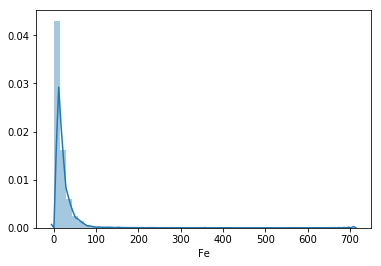

In [29]:
seaborn.distplot(mini_ds['Fe'].dropna())

Se descartan valores muy raros en la muestra:

In [22]:
mini_ds[mini_ds['Fe'] > 400].shape[0]

4

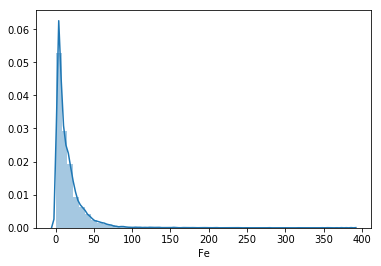

In [7]:
fe_clean = mini_ds[mini_ds['Fe'] < 400]
seaborn.distplot(fe_clean['Fe'].dropna())

Buscamos mas datos sobre los outliers

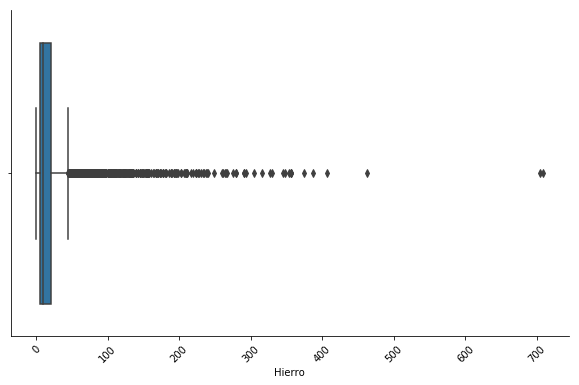

In [31]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=mini_ds[data],
                x='Fe')
plt.xlabel('Hierro')
plt.xticks(rotation=45)
seaborn.despine()

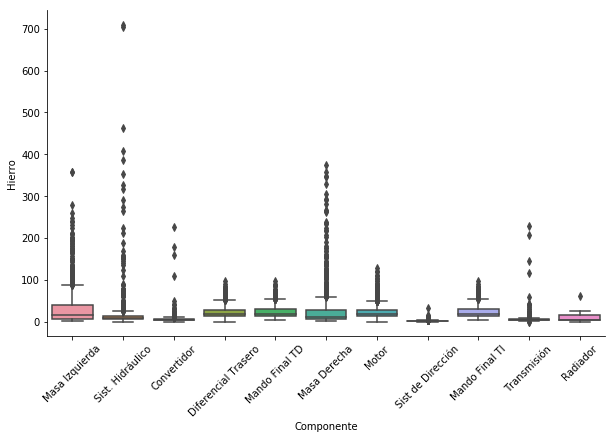

In [85]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=mini_ds, x='Componente', y='Fe')
plt.ylabel('Hierro')
plt.xlabel('Componente')
plt.xticks(rotation=45)
seaborn.despine()

In [19]:
mini_ds[mini_ds['Fe'] > 400]

Equipo        Componente      Id  Resultado  Horas Funcionamiento  \
27       1356  Sist. Hidráulico  155972          3                 27624   
7159     1395  Sist. Hidráulico  280961          3                 43242   
12954    1405  Sist. Hidráulico  275521          3                 40048   
13365    1407  Sist. Hidráulico  225504          3                 38458   

       Horas del Aceite  St   Al     Fe    Si    Na  VISCO  
27                187.0 NaN  1.0  407.0  13.0  19.0    7.0  
7159              587.0 NaN  5.0  705.0  20.0   3.0    6.7  
12954             424.0 NaN  1.0  709.0  14.0   4.0    6.6  
13365             379.0 NaN  1.0  462.0   8.0  10.0    6.4

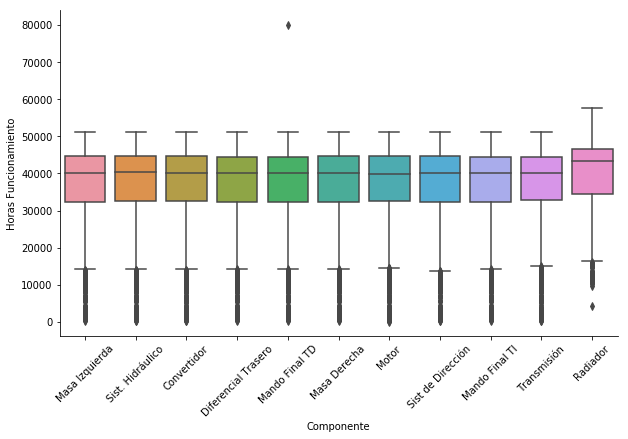

In [23]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=mini_ds, x='Componente', y='Horas_Funcionamiento')
plt.ylabel('Horas Funcionamiento')
plt.xlabel('Componente')
plt.xticks(rotation=45)
seaborn.despine()

In [34]:
dataset[dataset['Horas_Funcionamiento'] > 60000]

Equipo      Componente      Id  Resultado  Horas_Funcionamiento  \
12297    1402  Mando Final TD  248433          2                 79990   

       Horas_del_Aceite     B  Nit  Oxi   Sul  ...      P     Zn   Ag   Ti  \
12297            1197.0  89.0  4.0  9.0  12.0  ...  370.0  106.0  0.0  0.0   

       VISCO  TBN  TAN  ISO14  ISO4  ISO6  
12297   21.9  NaN  NaN   11.0  20.0  15.0  

[1 rows x 42 columns]

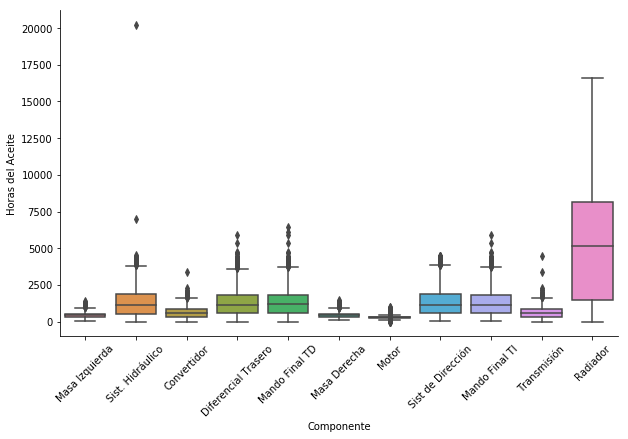

In [11]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=mini_ds, x='Componente', y='Horas del Aceite')
plt.ylabel('Horas del Aceite')
plt.xlabel('Componente')
plt.xticks(rotation=45)
seaborn.despine()

In [36]:
dataset[dataset['Horas_del_Aceite'] > 17000]

Equipo        Componente      Id  Resultado  Horas_Funcionamiento  \
17790    1426  Sist. Hidráulico  229563          2                 31873   

       Horas_del_Aceite    B  Nit  Oxi  Sul  ...      P      Zn   Ag   Ti  \
17790           20208.0  0.0  NaN  NaN  NaN  ...  964.0  1188.0  0.0  0.0   

       VISCO  TBN  TAN  ISO14  ISO4  ISO6  
17790    6.8  NaN  NaN   12.0  20.0  16.0  

[1 rows x 42 columns]

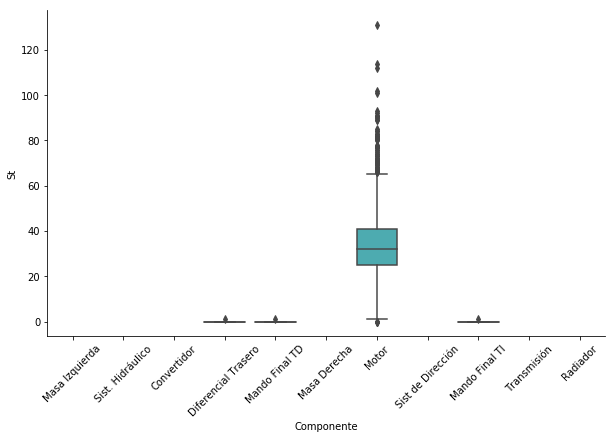

In [10]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=mini_ds, x='Componente', y='St')
plt.ylabel('St')
plt.xlabel('Componente')
plt.xticks(rotation=45)
seaborn.despine()

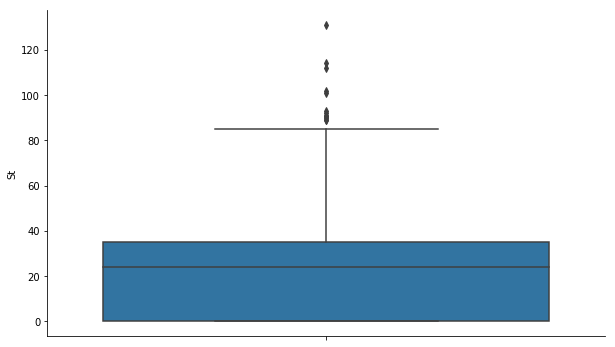

In [37]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=mini_ds, y='St')
plt.ylabel('St')
plt.xticks(rotation=45)
seaborn.despine()

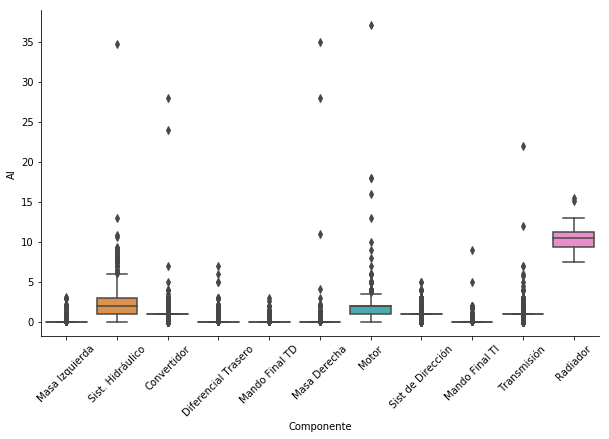

In [14]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=mini_ds, x='Componente', y='Al')
plt.ylabel('Al')
plt.xlabel('Componente')
plt.xticks(rotation=45)
seaborn.despine()

In [67]:
dataset[dataset['Al'] > 15]

Equipo        Componente      Id  Resultado  Horas_Funcionamiento  \
25       1355      Masa Derecha  278700          3                 22349   
47       1355      Masa Derecha  284180          3                 22729   
446      1360  Sist. Hidráulico  253201          2                 48274   
1239     1366             Motor  259186          3                 46019   
1976     1372             Motor  191921          3                 40116   
2184     1366             Motor  258493          3                 45977   
6277     1391       Convertidor  203879          1                 41492   
6279     1391       Convertidor  211524          3                 42042   
9143     1391       Transmisión  196572          3                 40951   
11345    1418             Motor  255029          2                 33305   
17440    1946          Radiador  256388          3                 48576   
17882    1946          Radiador  256390          3                 33305   

       Horas_del_Aceite      B   Nit   Oxi   Sul  ...       P      Zn   Ag  \
25                399.0  114.0   NaN   NaN   NaN  ...   323.0     0.0  0.0   
47                380.0   98.0   NaN   NaN   NaN  ...   309.0    13.0  0.0   
446              3169.0    2.3   NaN   NaN   NaN  ...   762.0  1203.0  0.1   
1239              154.0  492.0  10.0  16.0  24.0  ...  1150.0  1255.0  1.0   
1976              275.0  486.0  12.0  16.0  27.0  ...  1126.0  1323.0  0.0   
2184              112.0  420.0   7.0  15.0  23.0  ...  1110.0  1201.0  0.0   
6277              279.0    3.0   NaN   NaN   NaN  ...   858.0  1114.0  0.0   
6279              829.0    4.0   NaN   NaN   NaN  ...   884.0  1123.0  0.0   
9143              852.0    5.0   NaN   NaN   NaN  ...   903.0  1155.0  0.0   
11345             254.0  110.0   NaN   NaN   NaN  ...  1082.0  1618.0  0.1   
17440            2247.0    3.4   NaN   NaN   NaN  ...     0.1     0.1  0.1   
17882            5833.0    2.8   NaN   NaN   NaN  ...     0.1     0.1  0.1   

        Ti  VISCO  TBN  TAN  ISO14  ISO4  ISO6  
25     1.0  25.00  NaN  NaN    NaN   NaN   NaN  
47     2.0  24.60  NaN  NaN    NaN   NaN   NaN  
446    4.1   6.61  NaN  NaN    NaN   NaN   NaN  
1239   0.0  14.70  NaN  NaN    NaN   NaN   NaN  
1976   0.0  15.90  NaN  NaN    NaN   NaN   NaN  
2184   0.0  14.30  NaN  NaN    NaN   NaN   NaN  
6277   1.0  11.40  NaN  NaN    NaN   NaN   NaN  
6279   1.0  11.20  NaN  NaN    NaN   NaN   NaN  
9143   1.0  11.00  NaN  NaN   20.0  24.0  23.0  
11345  6.8  14.47  NaN  NaN    NaN   NaN   NaN  
17440  0.4    NaN  NaN  NaN    NaN   NaN   NaN  
17882  0.4    NaN  NaN  NaN    NaN   NaN   NaN  

[12 rows x 42 columns]

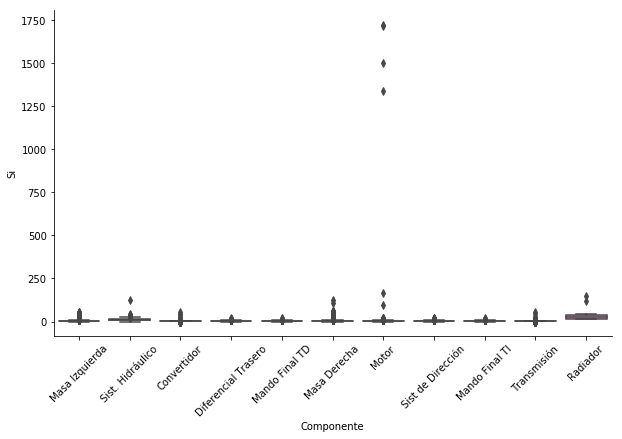

In [15]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=mini_ds, x='Componente', y='Si')
plt.ylabel('Si')
plt.xlabel('Componente')
plt.xticks(rotation=45)
seaborn.despine()

In [66]:
dataset[dataset['Si'] > 1000]

Equipo Componente      Id  Resultado  Horas_Funcionamiento  \
14651    1834      Motor  269441          2                 17829   
16475    1834      Motor  270353          2                 17868   
17625    1834      Motor  273136          2                 18057   
17626    1834      Motor  274912          3                 18148   

       Horas_del_Aceite     B  Nit   Oxi   Sul  ...       P      Zn   Ag   Ti  \
14651             215.0  46.0  7.0  16.0  20.0  ...  1110.0  1297.0  0.0  0.0   
16475             254.0  44.0  7.0  17.0  21.0  ...  1104.0  1306.0  0.0  0.0   
17625             443.0  42.0  9.0  18.0  23.0  ...  1062.0  1290.0  0.0  0.0   
17626             443.0  33.0  8.0  18.0  22.0  ...  1085.0  1274.0  0.0  0.0   

       VISCO  TBN  TAN  ISO14  ISO4  ISO6  
14651   14.0  9.8  NaN    NaN   NaN   NaN  
16475   14.1  9.6  NaN    NaN   NaN   NaN  
17625   14.2  9.8  NaN    NaN   NaN   NaN  
17626   14.3  9.9  NaN    NaN   NaN   NaN  

[4 rows x 42 columns]

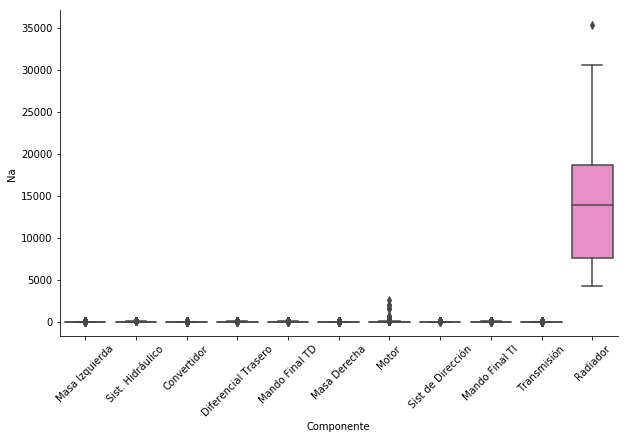

In [16]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=mini_ds, x='Componente', y='Na')
plt.ylabel('Na')
plt.xlabel('Componente')
plt.xticks(rotation=45)
seaborn.despine()

In [40]:
dataset[dataset['Na'] > 30000]

Equipo Componente      Id  Resultado  Horas_Funcionamiento  \
17881    1946   Radiador  256389          3                 34233   
18387    1946   Radiador  256392          3                 48007   

       Horas_del_Aceite      B  Nit  Oxi  Sul  ...    P   Zn   Ag   Ti  VISCO  \
17881            4018.0  156.0  NaN  NaN  NaN  ...  0.1  0.8  0.1  0.3    NaN   
18387            3653.0  203.0  NaN  NaN  NaN  ...  0.1  3.4  0.1  0.3    NaN   

       TBN  TAN  ISO14  ISO4  ISO6  
17881  NaN  NaN    NaN   NaN   NaN  
18387  NaN  NaN    NaN   NaN   NaN  

[2 rows x 42 columns]

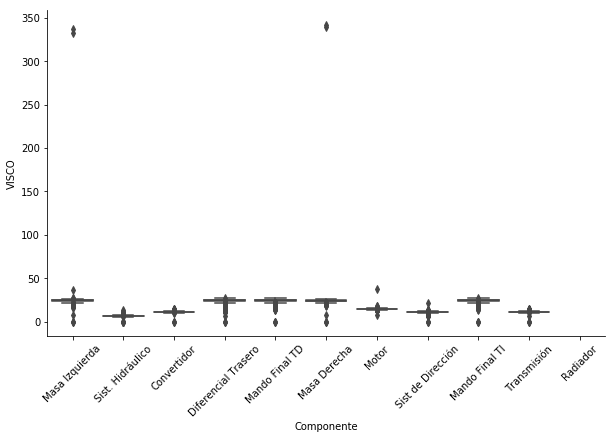

In [41]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=mini_ds, x='Componente', y='VISCO')
plt.ylabel('VISCO')
plt.xlabel('Componente')
plt.xticks(rotation=45)
seaborn.despine()

In [42]:
dataset[dataset['VISCO'] > 300]

Equipo      Componente      Id  Resultado  Horas_Funcionamiento  \
83     1356  Masa Izquierda  155977          1                 27624   
97     1356    Masa Derecha  155976          1                 27624   
124    1357    Masa Derecha  156981          1                 27876   
125    1357  Masa Izquierda  156986          1                 27876   

     Horas_del_Aceite   B  Nit  Oxi  Sul  ...      P    Zn   Ag   Ti  VISCO  \
83              663.0 NaN  NaN  NaN  NaN  ...  411.0  31.0  0.0  0.0  337.2   
97              663.0 NaN  NaN  NaN  NaN  ...  411.0  20.0  0.0  0.0  339.6   
124             519.0 NaN  NaN  NaN  NaN  ...  441.0  22.0  0.0  0.0  341.7   
125             519.0 NaN  NaN  NaN  NaN  ...  437.0  20.0  0.0  0.0  332.3   

     TBN  TAN  ISO14  ISO4  ISO6  
83   NaN  NaN   14.0  21.0  19.0  
97   NaN  NaN   14.0  21.0  19.0  
124  NaN  NaN   14.0  20.0  19.0  
125  NaN  NaN   18.0  21.0  20.0  

[4 rows x 42 columns]

In [24]:
def clean_fe(dataset):
    hierro = dataset['Fe']
    mask_fe_outlier = ((hierro >= 0) & (hierro < 400))
    mask_fe_outlier = mask_fe_outlier.dropna()
    return dataset[mask_fe_outlier]

In [13]:
cleaned_fe = clean_fe(mini_ds)

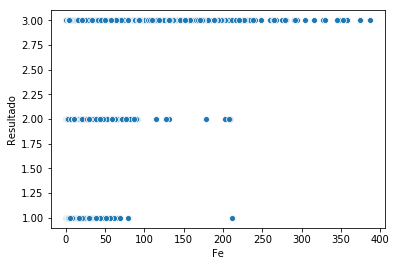

In [52]:
seaborn.scatterplot(data=cleaned_fe,
                    x=dataset['Fe'],
                    y='Resultado')

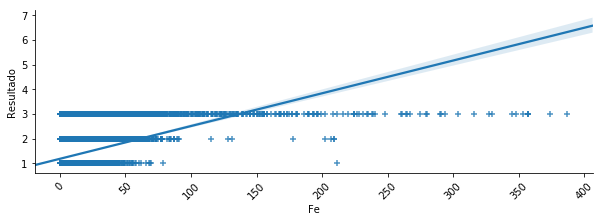

In [53]:
plt.figure(figsize=(10,3))
seaborn.regplot(data=cleaned_fe,
                x='Fe', y='Resultado',
                marker='+')
plt.xticks(rotation=45)
seaborn.despine()

In [54]:
cleaned_fe[['Fe', 'Resultado']].corr(method ='spearman')

Fe  Resultado
Fe         1.000000   0.378371
Resultado  0.378371   1.000000

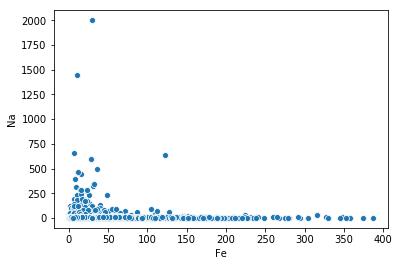

In [45]:
seaborn.scatterplot(data=cleaned_ds,
                    x=dataset['Fe'],
                    y='Na')

In [22]:
cleaned_fe[['Fe', 'Na']].corr(method ='spearman') 

Fe        Na
Fe  1.000000  0.493238
Na  0.493238  1.000000

2.1 Toma los motores de 3 equipos al azar (la columna Equipo contiene el Id del camión) y grafica la evolución de 3 features a lo largo del tiempo ¿Se puede ver algún patron en el comportamiento de los features?

In [25]:
def clean_hs_fun(dataset):
    hsfun = dataset['Horas_Funcionamiento']
    mask_hsfun_outlier = (hsfun >= 0) & (hsfun < 50000)
    return dataset[mask_hsfun_outlier]

In [26]:
def clean_hs_aceite(dataset):
    hsa = dataset['Horas_del_Aceite']
    mask_hsa_outlier =  (hsa >= 0) & (hsa < 17000)
    return dataset[mask_hsa_outlier]

In [27]:
def clean_st(dataset):
    st = dataset['St']
    mask_st_outlier = (st >= 0) & (st < 85)
    return dataset[mask_st_outlier]

In [28]:
def clean_si(dataset):
    si = dataset['Si']
    mask_si_outlier = (si >= 0) & (si < 1000)
    return dataset[mask_si_outlier]

In [29]:
def clean_na(dataset):
    na = dataset['Na']
    mask_na_outlier = (na >= 0) & (na < 35300)
    return dataset[mask_na_outlier]

In [30]:
def clean_al(dataset):
    al = dataset['Al']
    mask_al_outlier = (al >= 0) & (al < 15)
    return dataset[mask_al_outlier]

In [31]:
def clean_visco(dataset):
    visco = dataset['VISCO']
    mask_visco_outlier = (visco >= 0) & (visco < 300)
    return dataset[mask_visco_outlier]

Ojo, porque el St se debe completar con ceros !!! en lugar de eliminar

In [66]:
cleaned_st = clean_st(cleaned_hs)

NameError: name 'cleaned_hs' is not defined

In [32]:
cleaned_fe = clean_fe(mini_ds)

In [33]:
cleaned_hsfun = clean_hs_fun(cleaned_fe)

In [34]:
cleaned_hs = clean_hs_aceite(cleaned_hsfun)

In [35]:
cleaned_si = clean_si(cleaned_hs)

In [36]:
cleaned_na = clean_na(cleaned_si)

In [37]:
cleaned_al = clean_al(cleaned_na)

In [38]:
cleaned_ds = clean_visco(cleaned_al)

In [39]:
cleaned_ds.count()

Equipo                  16877
Componente              16877
Id                      16877
Resultado               16877
Horas_Funcionamiento    16877
Horas_del_Aceite        16877
St                       2800
Al                      16877
Fe                      16877
Si                      16877
Na                      16877
VISCO                   16877
dtype: int64

2.1 Toma los motores de 3 equipos al azar (la columna Equipo contiene el Id del camión) y grafica la evolución de 3 features a lo largo del tiempo ¿Se puede ver algún patron en el comportamiento de los features?

In [146]:
motor1395 = cleaned_ds.query('Equipo == 1395 and Componente == "Motor"') 

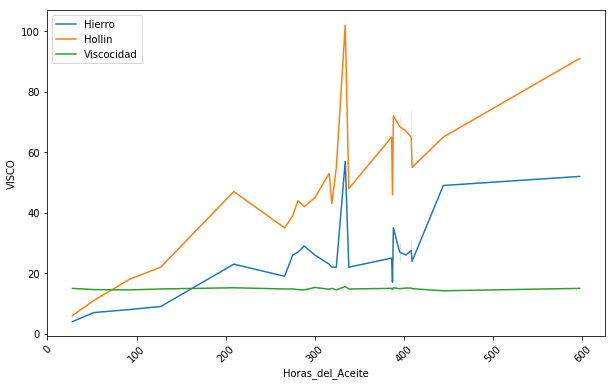

In [149]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=motor1395, x='Horas_del_Aceite', y='Fe', estimator='mean', label='Hierro')
seaborn.lineplot(data=motor1395, x='Horas_del_Aceite', y='St', estimator='mean', label='Hollin')
seaborn.lineplot(data=motor1395, x='Horas_del_Aceite', y='VISCO', estimator='mean', label='Viscocidad')
plt.xticks(rotation=45);

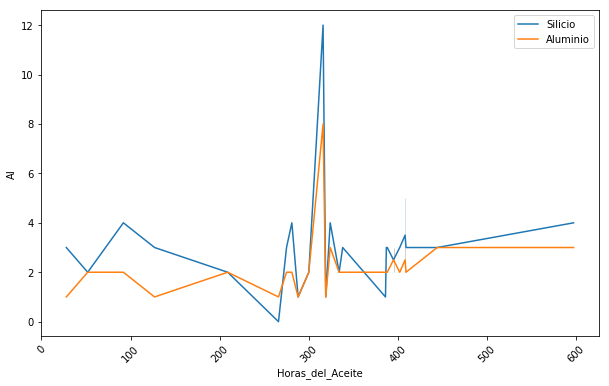

In [151]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=motor1395, x='Horas_del_Aceite', y='Si', estimator='mean', label='Silicio')
seaborn.lineplot(data=motor1395, x='Horas_del_Aceite', y='Al', estimator='mean', label='Aluminio')
plt.xticks(rotation=45);

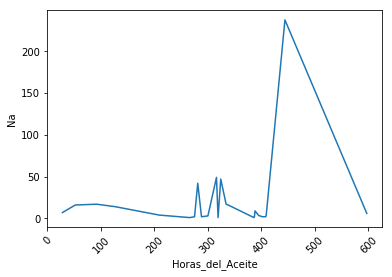

In [141]:
seaborn.lineplot(data=motor1395, x='Horas_del_Aceite', y='Na', estimator='mean')
plt.xticks(rotation=45);

In [152]:
motor1427 = cleaned_ds.query('Equipo == 1427 and Componente == "Motor"')

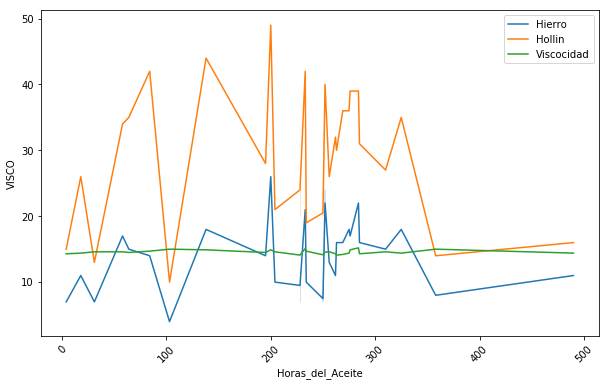

In [154]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=motor1427, x='Horas_del_Aceite', y='Fe', estimator='mean', label='Hierro')
seaborn.lineplot(data=motor1427, x='Horas_del_Aceite', y='St', estimator='mean', label='Hollin')
seaborn.lineplot(data=motor1427, x='Horas_del_Aceite', y='VISCO', estimator='mean', label='Viscocidad')
plt.xticks(rotation=45);

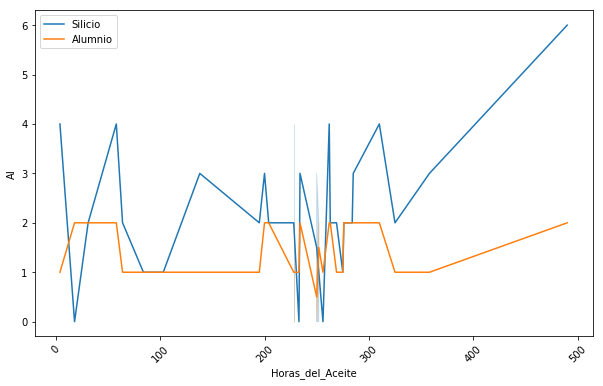

In [157]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=motor1427, x='Horas_del_Aceite', y='Si', estimator='mean', label='Silicio')
seaborn.lineplot(data=motor1427, x='Horas_del_Aceite', y='Al', estimator='mean', label='Alumnio')
plt.xticks(rotation=45);

In [158]:
motor2061 = cleaned_ds.query('Equipo == 2061 and Componente == "Motor"')

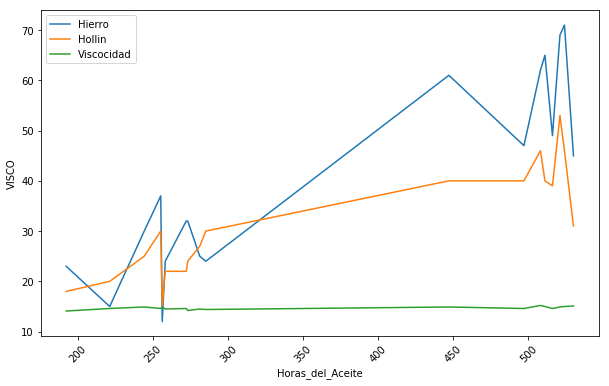

In [163]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=motor2061, x='Horas_del_Aceite', y='Fe', estimator='mean', label='Hierro')
seaborn.lineplot(data=motor2061, x='Horas_del_Aceite', y='St', estimator='mean', label='Hollin')
seaborn.lineplot(data=motor2061, x='Horas_del_Aceite', y='VISCO', estimator='mean', label='Viscocidad')
plt.xticks(rotation=45);

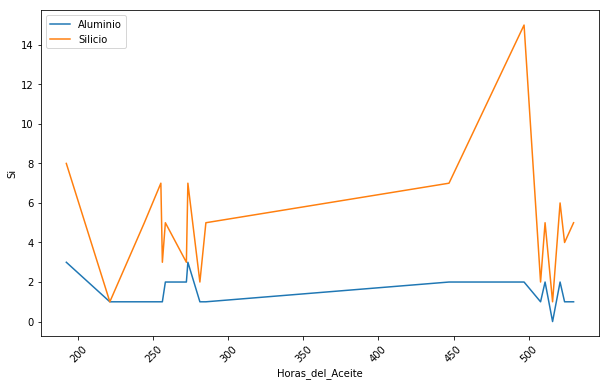

In [165]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=motor2061, x='Horas_del_Aceite', y='Al', estimator='mean', label='Aluminio')
seaborn.lineplot(data=motor2061, x='Horas_del_Aceite', y='Si', estimator='mean', label='Silicio')
plt.xticks(rotation=45);

Buscamos correlacion entre Hierro, Hollin, Viscocidad, Horas x:

In [166]:
motores = cleaned_ds.query('Componente == "Motor"')

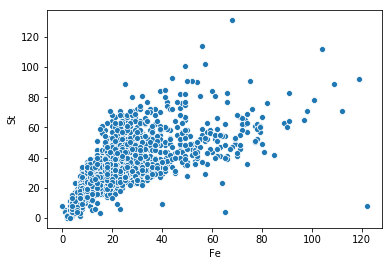

In [167]:
seaborn.scatterplot(data=motores,
                    x='Fe',
                    y='St')

In [168]:
motores[['Fe', 'St']].corr(method ='spearman')

Fe        St
Fe  1.000000  0.705137
St  0.705137  1.000000

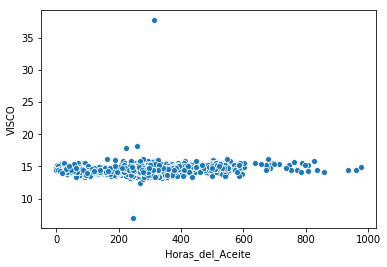

In [170]:
seaborn.scatterplot(data=motores,
                    x='Horas_del_Aceite',
                    y='VISCO')

In [173]:
motores[['VISCO', 'Horas_del_Aceite']].corr(method ='spearman')

VISCO  Horas_del_Aceite
VISCO             1.000000          0.239567
Horas_del_Aceite  0.239567          1.000000

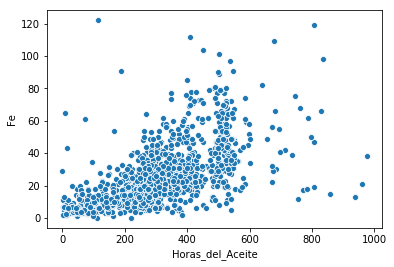

In [174]:
seaborn.scatterplot(data=motores,
                    x='Horas_del_Aceite',
                    y='Fe')

In [175]:
motores[['Horas_del_Aceite', 'Fe']].corr(method ='spearman')

Horas_del_Aceite        Fe
Horas_del_Aceite          1.000000  0.645874
Fe                        0.645874  1.000000

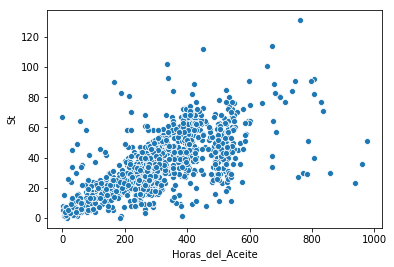

In [176]:
seaborn.scatterplot(data=motores,
                    x='Horas_del_Aceite',
                    y='St')

In [177]:
motores[['Horas_del_Aceite', 'St']].corr(method ='spearman')

Horas_del_Aceite      St
Horas_del_Aceite            1.0000  0.6584
St                          0.6584  1.0000

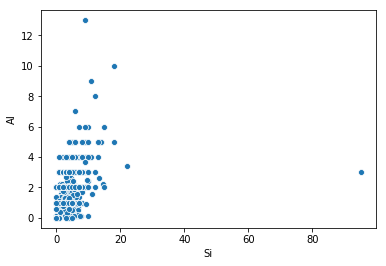

In [178]:
seaborn.scatterplot(data=motores,
                    x='Si',
                    y='Al')

In [179]:
motores[['Al', 'Si']].corr(method ='spearman')

Al        Si
Al  1.000000  0.362485
Si  0.362485  1.000000

NO HAY CORRELACION CUANDO NO ES EL MOTOR, TAMPOCO CON LAS HORAS DE FUNCIONAMIENTO

In [76]:
hierros_ds = reduced_ds[reduced_ds['Componente'].isin(["Diferencial Trasero", "Motor"])]

In [77]:
fe_cleaned_hierros_ds = clean_fe(hierros_ds)
hs_fe_cleaned_hierros_ds = clean_hs(fe_cleaned_hierros_ds)
hs_fe_cleaned_hierros_ds = hs_fe_cleaned_hierros_ds.dropna()

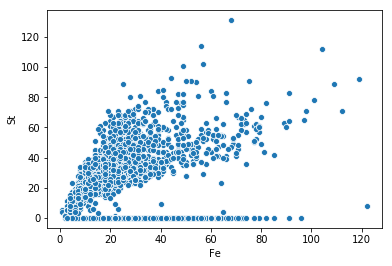

In [78]:
seaborn.scatterplot(data=hs_fe_cleaned_hierros_ds,
                    x='Fe',
                    y='St')

In [79]:
hs_fe_cleaned_hierros_ds[['Fe', 'St']].corr(method ='spearman')

Fe        St
Fe  1.000000  0.326643
St  0.326643  1.000000

2.2 Ahora realiza los mismos gráficos pero tomando un equpo y 3 componentes y analiza el resultado

In [186]:
equipo1395 = cleaned_ds.query('Equipo == 1395')

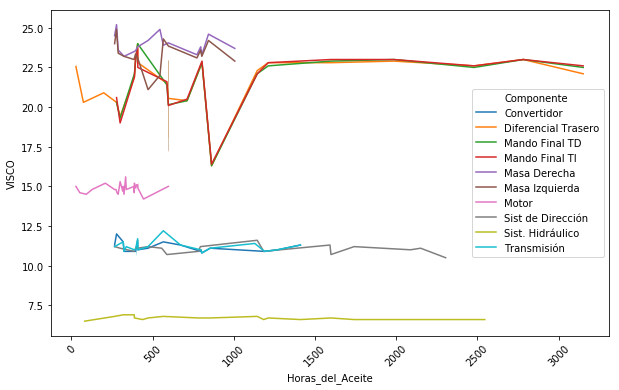

In [183]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395,
                  x='Horas_del_Aceite', y='VISCO', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

In [192]:
equipo1395_3compo = equipo1395.query('Componente in("Diferencial Trasero", "Mando Final TD", "Mando Final TI")')

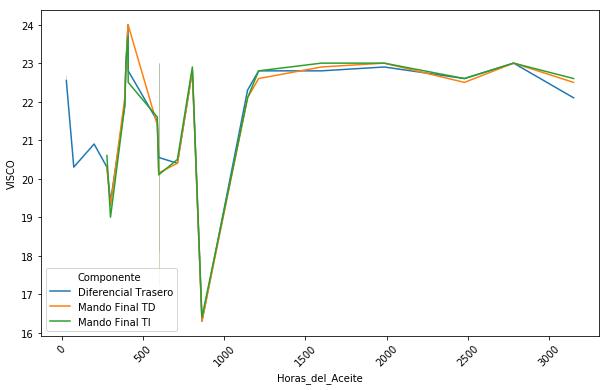

In [209]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_3compo,
                  x='Horas_del_Aceite', y='VISCO', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

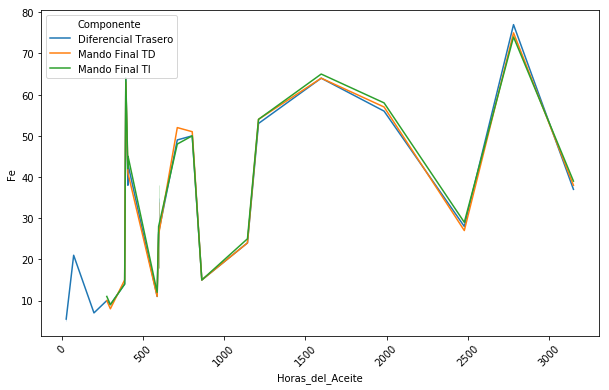

In [226]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_3compo,
                  x='Horas_del_Aceite', y='Fe', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

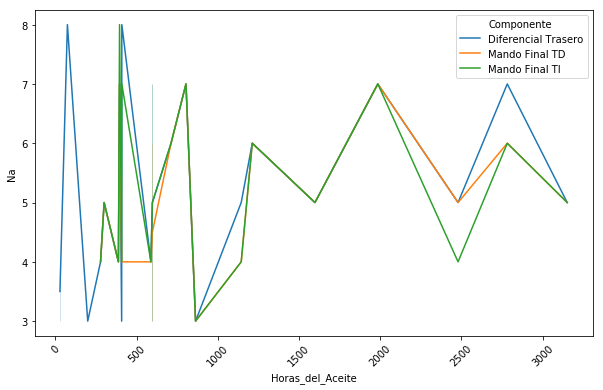

In [211]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_3compo,
                  x='Horas_del_Aceite', y='Na', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

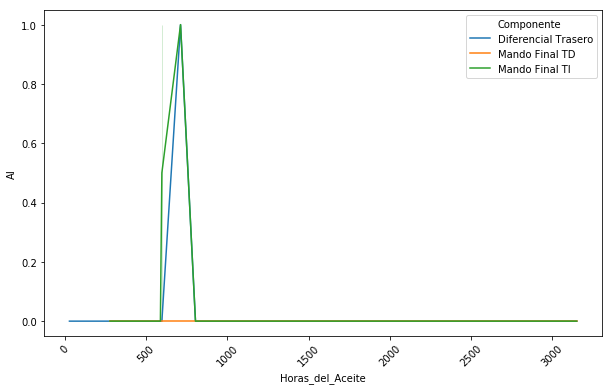

In [214]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_3compo,
                  x='Horas_del_Aceite', y='Al', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

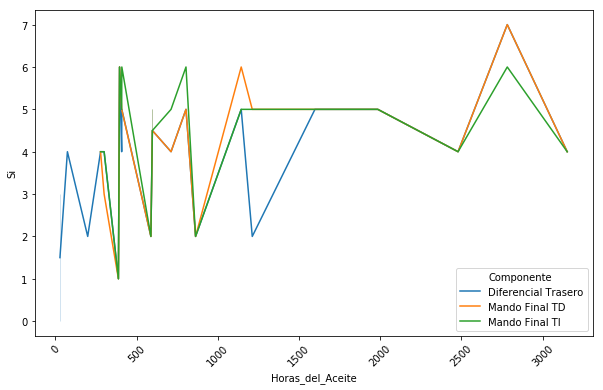

In [215]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_3compo,
                  x='Horas_del_Aceite', y='Si', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

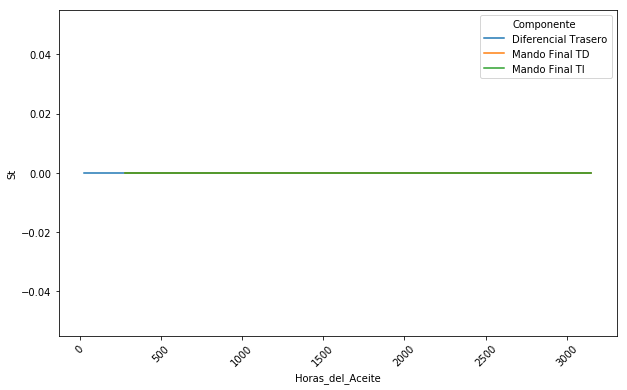

In [216]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_3compo,
                  x='Horas_del_Aceite', y='St', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

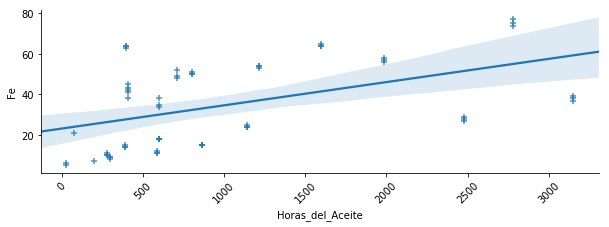

In [217]:
plt.figure(figsize=(10,3))
seaborn.regplot(data=equipo1395_3compo,
                x='Horas_del_Aceite', y='Fe',
                marker='+')
plt.xticks(rotation=45)
seaborn.despine()

In [227]:
equipo1395_3compo[['Horas_del_Aceite', 'Fe']].corr(method ='spearman')

Horas_del_Aceite        Fe
Horas_del_Aceite          1.000000  0.602664
Fe                        0.602664  1.000000

In [223]:
equipo1395_3compo[['Horas_del_Aceite', 'Al']].corr(method ='spearman')

Horas_del_Aceite   Al
Horas_del_Aceite               1.0  0.0
Al                             0.0  1.0

In [224]:
equipo1395_3compo[['Horas_del_Aceite', 'Si']].corr(method ='spearman')

Horas_del_Aceite        Si
Horas_del_Aceite          1.000000  0.349961
Si                        0.349961  1.000000

In [225]:
equipo1395_3compo[['Horas_del_Aceite', 'Na']].corr(method ='spearman')

Horas_del_Aceite        Na
Horas_del_Aceite          1.000000  0.232837
Na                        0.232837  1.000000

In [228]:
equipo1395_3compo[['Horas_del_Aceite', 'St']].corr(method ='spearman')

Horas_del_Aceite  St
Horas_del_Aceite               1.0 NaN
St                             NaN NaN

In [221]:
equipo1395_3compo[['Horas_del_Aceite', 'VISCO']].corr(method ='spearman')

Horas_del_Aceite     VISCO
Horas_del_Aceite          1.000000  0.298079
VISCO                     0.298079  1.000000

In [201]:
equipo1395_3otros = equipo1395.query('Componente in("Masa Derecha", "Masa Izquierda", "Sist. Hidráulico")')

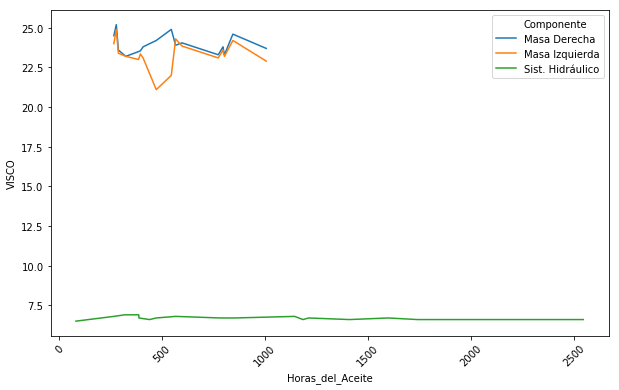

In [229]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_3otros,
                  x='Horas_del_Aceite', y='VISCO', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

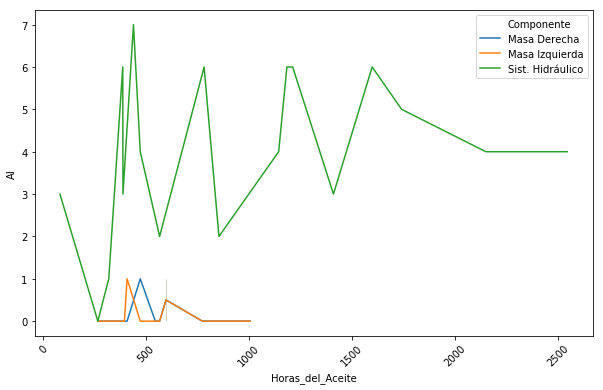

In [231]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_3otros,
                  x='Horas_del_Aceite', y='Al', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

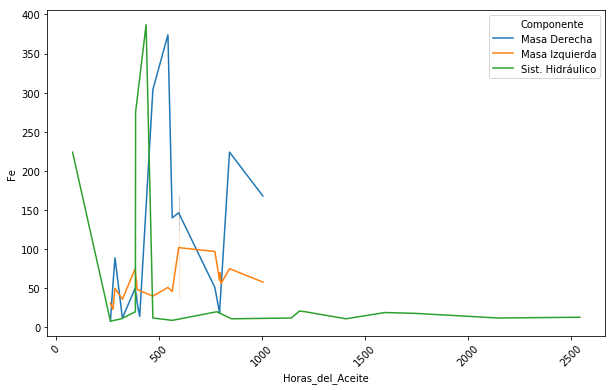

In [232]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_3otros,
                  x='Horas_del_Aceite', y='Fe', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

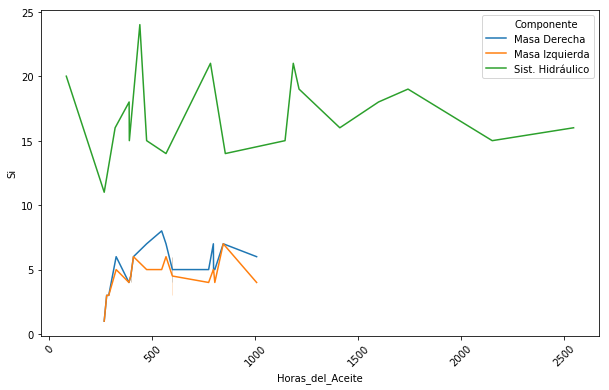

In [233]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_3otros,
                  x='Horas_del_Aceite', y='Si', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

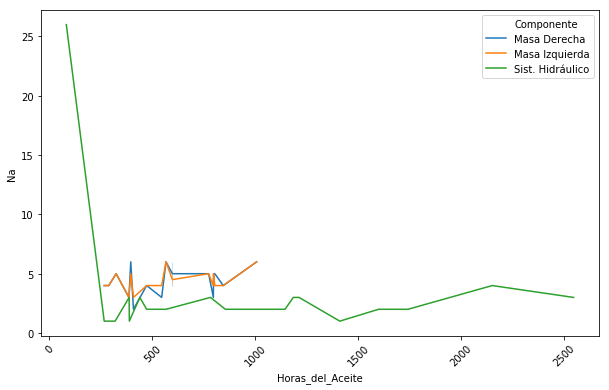

In [234]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_3otros,
                  x='Horas_del_Aceite', y='Na', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

In [235]:
equipo1395_3otros[['Horas_del_Aceite', 'Fe']].corr(method ='spearman')

Horas_del_Aceite        Fe
Horas_del_Aceite          1.000000 -0.075385
Fe                       -0.075385  1.000000

In [236]:
equipo1395_3otros[['Horas_del_Aceite', 'Al']].corr(method ='spearman')

Horas_del_Aceite        Al
Horas_del_Aceite          1.000000  0.339465
Al                        0.339465  1.000000

In [237]:
equipo1395_3otros[['Horas_del_Aceite', 'Si']].corr(method ='spearman')

Horas_del_Aceite        Si
Horas_del_Aceite          1.000000  0.405103
Si                        0.405103  1.000000

In [238]:
equipo1395_3otros[['Horas_del_Aceite', 'Na']].corr(method ='spearman')

Horas_del_Aceite        Na
Horas_del_Aceite          1.000000 -0.095692
Na                       -0.095692  1.000000

In [239]:
equipo1395_3otros[['Horas_del_Aceite', 'St']].corr(method ='spearman')

Horas_del_Aceite  St
Horas_del_Aceite               1.0 NaN
St                             NaN NaN

In [240]:
equipo1395_3otros[['Horas_del_Aceite', 'VISCO']].corr(method ='spearman')

Horas_del_Aceite     VISCO
Horas_del_Aceite          1.000000 -0.271508
VISCO                    -0.271508  1.000000

In [241]:
equipo1395_ultimos3 = equipo1395.query('Componente in("Transmisión", "Sist de Dirección", "Convertidor")')

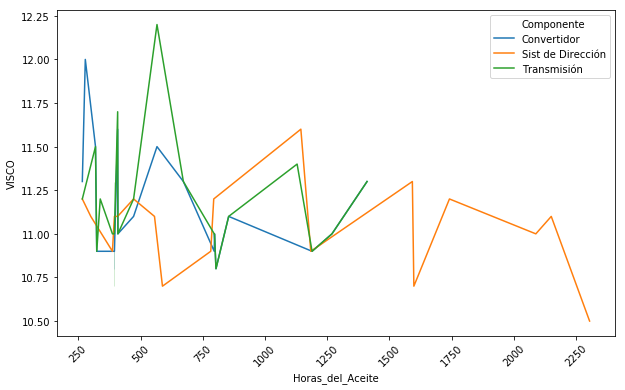

In [242]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_ultimos3,
                  x='Horas_del_Aceite', y='VISCO', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

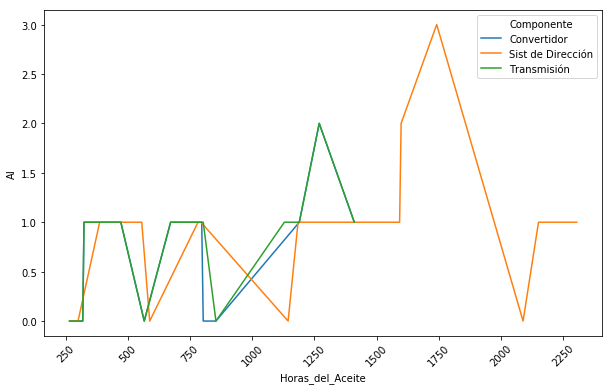

In [244]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_ultimos3,
                  x='Horas_del_Aceite', y='Al', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

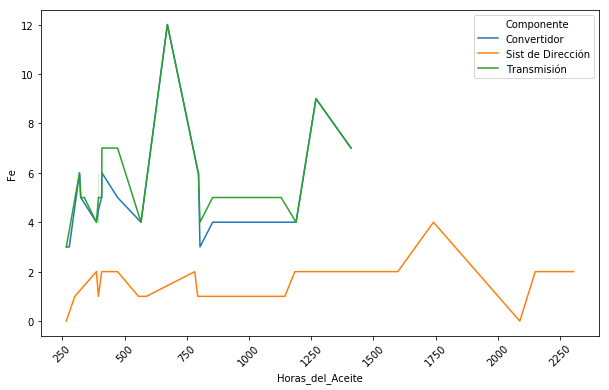

In [245]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_ultimos3,
                  x='Horas_del_Aceite', y='Fe', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

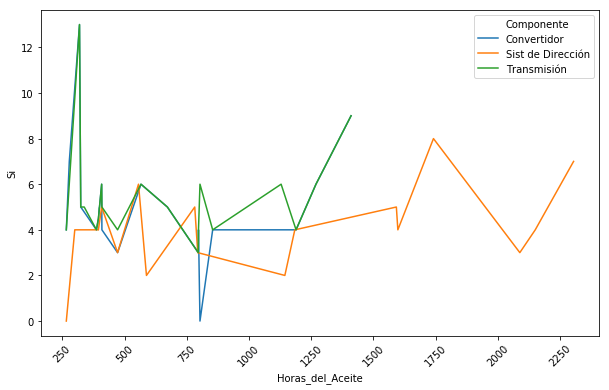

In [246]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_ultimos3,
                  x='Horas_del_Aceite', y='Si', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

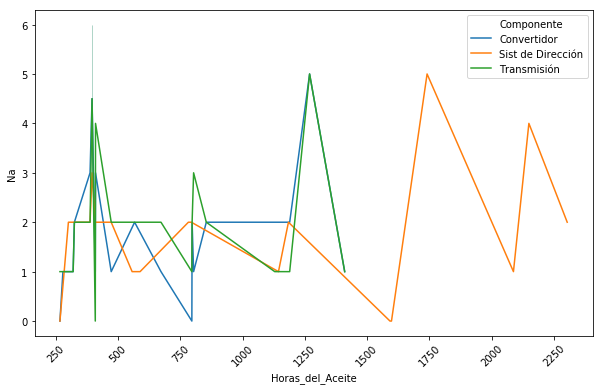

In [247]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=equipo1395_ultimos3,
                  x='Horas_del_Aceite', y='Na', estimator='mean', hue='Componente')
plt.xticks(rotation=45);

In [248]:
equipo1395_3otros[['Horas_del_Aceite', 'St']].corr(method ='spearman')

Horas_del_Aceite  St
Horas_del_Aceite               1.0 NaN
St                             NaN NaN

In [249]:
equipo1395_3otros[['Horas_del_Aceite', 'Al']].corr(method ='spearman')

Horas_del_Aceite        Al
Horas_del_Aceite          1.000000  0.339465
Al                        0.339465  1.000000

In [250]:
equipo1395_3otros[['Horas_del_Aceite', 'Fe']].corr(method ='spearman')

Horas_del_Aceite        Fe
Horas_del_Aceite          1.000000 -0.075385
Fe                       -0.075385  1.000000

In [251]:
equipo1395_3otros[['Horas_del_Aceite', 'Si']].corr(method ='spearman')

Horas_del_Aceite        Si
Horas_del_Aceite          1.000000  0.405103
Si                        0.405103  1.000000

In [252]:
equipo1395_3otros[['Horas_del_Aceite', 'Na']].corr(method ='spearman')

Horas_del_Aceite        Na
Horas_del_Aceite          1.000000 -0.095692
Na                       -0.095692  1.000000

In [253]:
equipo1395_3otros[['Horas_del_Aceite', 'VISCO']].corr(method ='spearman')

Horas_del_Aceite     VISCO
Horas_del_Aceite          1.000000 -0.271508
VISCO                    -0.271508  1.000000

3.1 A mayor cantidad de horas de uso de aceite, baja la viscocidad del mismo y aumenta la presencia de Hierro en el mismo ?

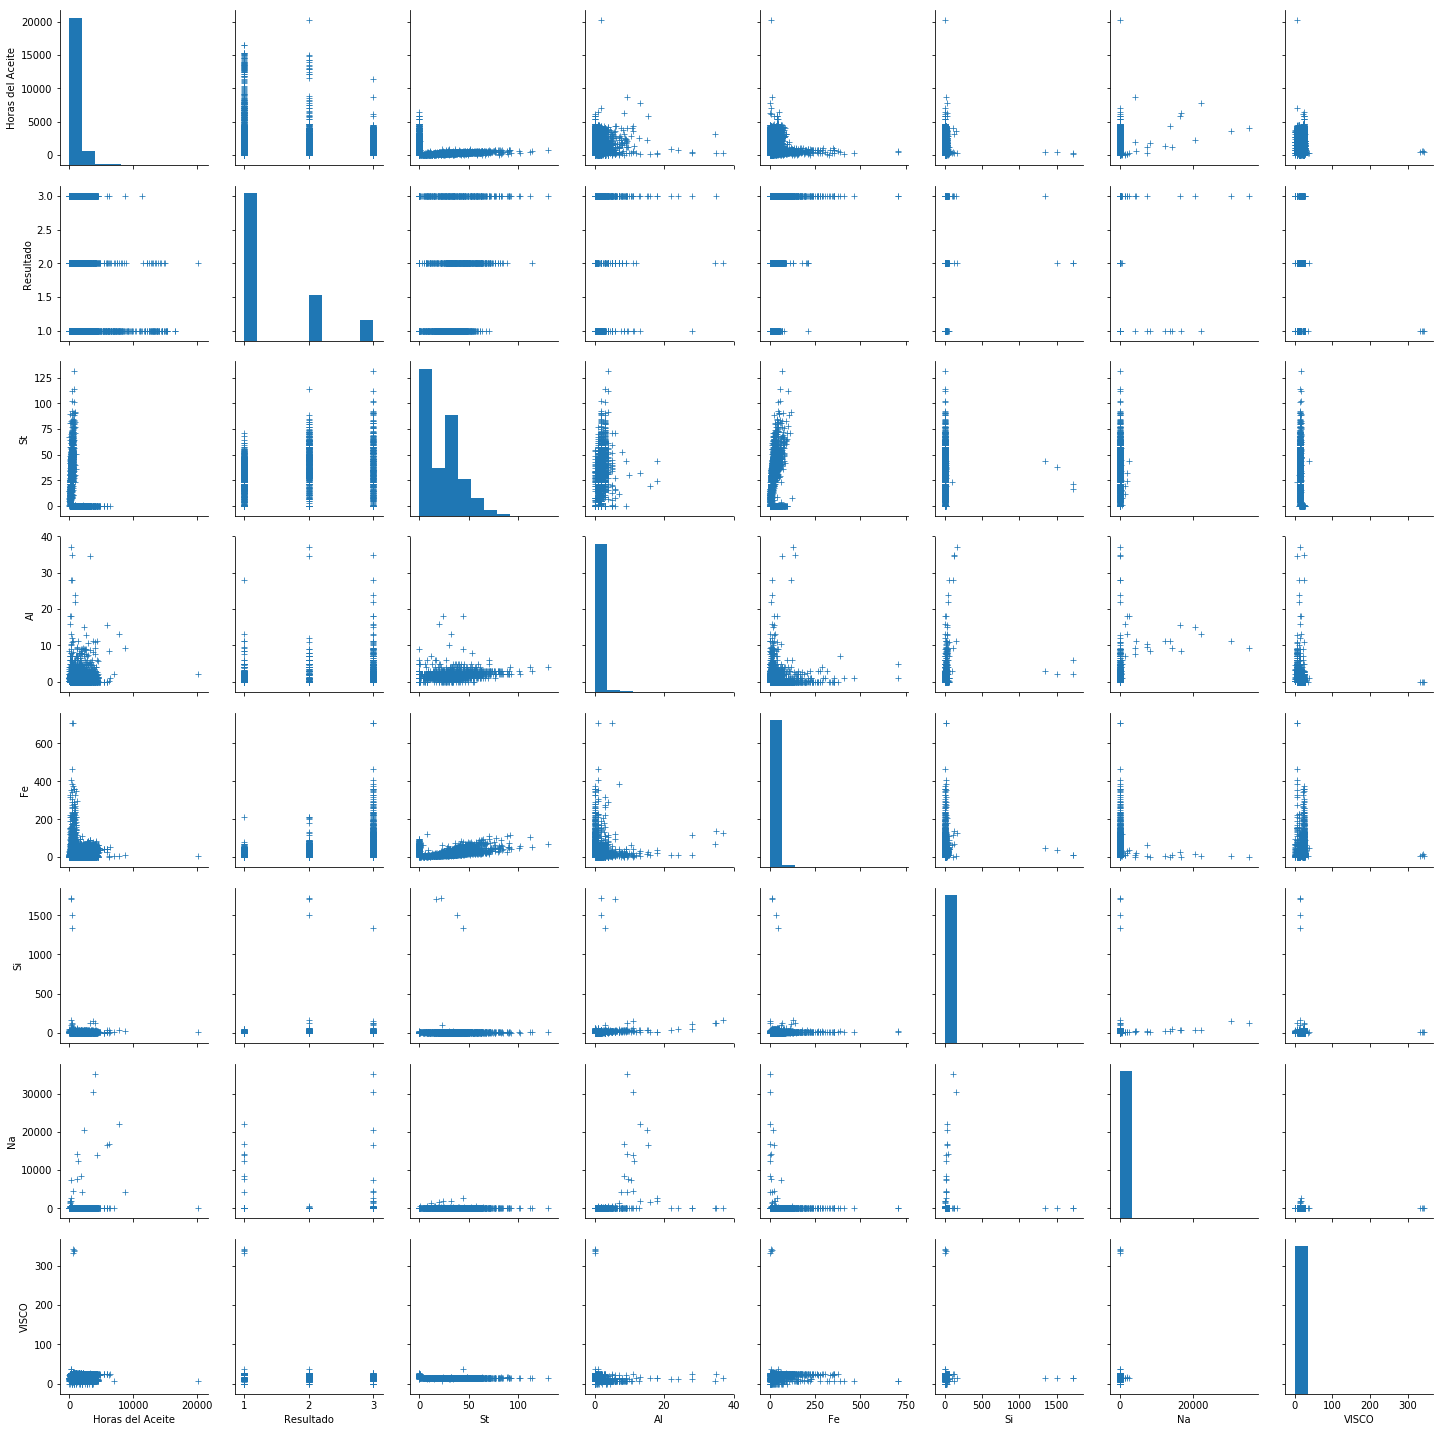

In [105]:
seaborn.pairplot(
    data=reduced_ds,
    vars=['Horas del Aceite', 'Resultado', 'St','Al','Fe','Si','Na','VISCO'],
    markers='+')

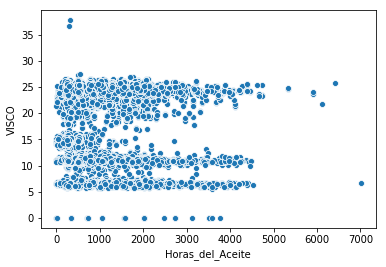

In [79]:
seaborn.scatterplot(data=cleaned_ds,
                    x='Horas_del_Aceite',
                    y='VISCO')

In [80]:
cleaned_ds[['Horas_del_Aceite', 'VISCO']].corr(method ='spearman')

Horas_del_Aceite     VISCO
Horas_del_Aceite          1.000000 -0.068636
VISCO                    -0.068636  1.000000

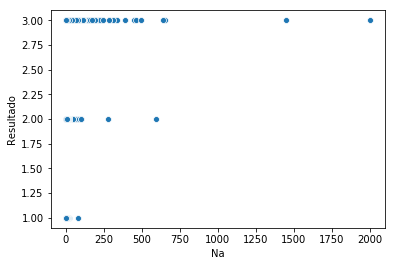

In [82]:
seaborn.scatterplot(data=cleaned_ds,
                    x='Na',
                    y='Resultado')

In [83]:
cleaned_ds[['Na', 'Resultado']].corr(method ='spearman')

Na  Resultado
Na         1.000000   0.181019
Resultado  0.181019   1.000000

In [ ]:
Verifico uno de los valores con dropna en lugar de >=0

In [84]:
def clean_nas(dataset):
    sodio = dataset['Na']
    mask_sodio_outlier = (sodio < 1500) & (sodio.dropna())
    return dataset[mask_sodio_outlier]

In [89]:
nas = clean_nas(mini_ds)

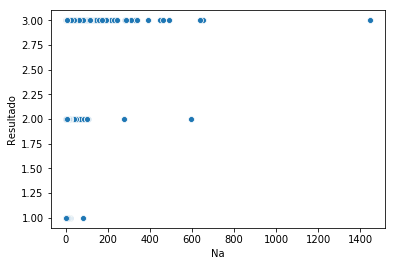

In [90]:
seaborn.scatterplot(data=nas,
                    x='Na',
                    y='Resultado')

In [91]:
nas[['Na', 'Resultado']].corr(method ='spearman')

Na  Resultado
Na         1.000000   0.184733
Resultado  0.184733   1.000000